In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
x= torch.linspace(-10,10,60)

### sigmod 函数
$a=\frac{1}{1+e^{-z}}$ 导数 ：$a^\prime =a(1 - a)$

在sigmod函数中我们可以看到，其输出是在(0,1)这个开区间，它能够把输入的连续实值变换为0和1之间的输出，如果是非常大的负数，那么输出就是0；如果是非常大的正数输出就是1，起到了抑制的作用。

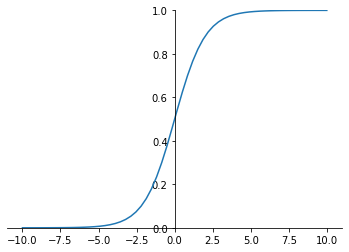

In [14]:
#sigmod函数
ax = plt.gca()
ax.spines['right'].set_color('none') #右边界无颜色
ax.spines['top'].set_color('none') #上边界无颜色
ax.xaxis.set_ticks_position('bottom') #x轴所在的位置，下
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left') #y轴所在的位置，左
ax.spines['left'].set_position(('data', 0))
plt.ylim((0, 1)) #y轴范围
sigmod=torch.sigmoid(x)
plt.plot(x.numpy(),sigmod.numpy())

但是sigmod由于需要进行指数运算（这个对于计算机来说是比较慢，相比relu），再加上函数输出不是以0为中心的（这样会使权重更新效率降低），当输入稍微远离了坐标原点，函数的梯度就变得很小了（几乎为零）。在神经网络反向传播的过程中不利于权重的优化，这个问题叫做梯度饱和，也可以叫梯度弥散。这些不足，所以现在使用到sigmod基本很少了，基本上只有在做二元分类（0，1）时的输出层才会使用。

### tanh 函数
$a=\frac{e^z-e^{-z}}{e^z+e^{-z}}$ 导数：$a^\prime =1 - a^2$ 

tanh是双曲正切函数，输出区间是在(-1,1)之间，而且整个函数是以0为中心的

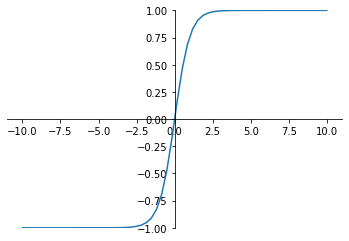

In [16]:
#tanh函数
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-1, 1))
tanh=torch.tanh(x)
plt.plot(x.numpy(),tanh.numpy())

与sigmoid函数类似，当输入稍微远离了坐标原点，梯度还是会很小，但是好在tanh是以0为中心点，如果使用tanh作为激活函数，还能起到归一化（均值为0）的效果。

一般二分类问题中，隐藏层用tanh函数，输出层用sigmod函数，但是随着Relu的出现所有的隐藏层基本上都使用relu来作为激活函数了

### ReLU 函数
Relu（Rectified Linear Units）修正线性单元

$a=max(0,z)$ 导数大于0时1，小于0时0。

也就是说：
z>0时，梯度始终为1，从而提高神经网络基于梯度算法的运算速度。然而当
z<0时，梯度一直为0。
ReLU函数只有线性关系（只需要判断输入是否大于0）不管是前向传播还是反向传播，都比sigmod和tanh要快很多，

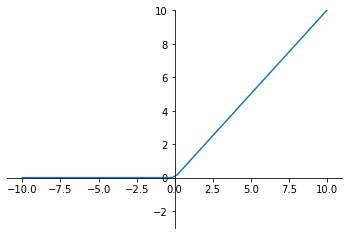

In [17]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
relu=F.relu(x)
plt.plot(x.numpy(),relu.numpy())

当输入是负数的时候，ReLU是完全不被激活的，这就表明一旦输入到了负数，ReLU就会死掉。但是到了反向传播过程中，输入负数，梯度就会完全到0，这个和sigmod函数、tanh函数有一样的问题。 但是实际的运用中，该缺陷的影响不是很大。

### Leaky Relu 函数
为了解决relu函数z<0时的问题出现了 Leaky ReLU函数，该函数保证在z<0的时候，梯度仍然不为0。
ReLU的前半段设为αz而非0，通常α=0.01 $ a=max(\alpha z,z)$

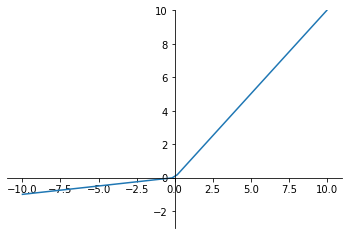

In [18]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
l_relu=F.leaky_relu(x,0.1) # 这里的0.1是为了方便展示，理论上应为0.01甚至更小的值
plt.plot(x.numpy(),l_relu.numpy())

理论上来讲，Leaky ReLU有ReLU的所有优点，但是在实际操作当中，并没有完全证明Leaky ReLU总是好于ReLU。

ReLU目前仍是最常用的activation function，在隐藏层中推荐优先尝试！